In [226]:
import numpy as np
import pandas as pd 
import seaborn as sns
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error, mean_squared_log_error, explained_variance_score

In [227]:
dataset=pd.read_csv("shipmode_pred.csv")
dataset

,Order ID,Order Priority,Product ID,Category,Sub-Category,Quantity,Sales,Discount,Shipping Cost,Ship Mode,Country,Order Date,Ship Date,Market
0,IZ-2014-4660,Medium,FUR-ADV-10000002,Furniture,Furnishings,1,53.040,0.0,4.03,Standard Class,Iraq,2014-09-08,2014-09-15,EMEA
1,MO-2012-8110,Medium,FUR-ADV-10000108,Furniture,Furnishings,1,50.010,0.0,2.83,Standard Class,Morocco,2012-05-10,2012-05-17,Africa
2,RW-2012-8200,Medium,FUR-ADV-10000108,Furniture,Furnishings,4,200.040,0.0,10.80,Standard Class,Rwanda,2012-02-20,2012-02-24,Africa
3,LI-2011-9980,High,FUR-ADV-10000108,Furniture,Furnishings,2,100.020,0.0,9.27,Second Class,Liberia,2011-04-13,2011-04-15,Africa
4,TU-2014-4400,Medium,FUR-ADV-10000183,Furniture,Furnishings,4,84.768,0.6,7.54,Standard Class,Turkey,2014-08-15,2014-08-19,EMEA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49665,MZ-2013-3540,Medium,TEC-STA-10004542,Technology,Machines,2,80.160,0.0,4.68,Standard Class,Mozambique,2013-04-19,2013-04-23,Africa
49666,GH-2014-4170,Medium,TEC-STA-10004542,Technology,Machines,14,561.120,0.0,117.40,First Class,Ghana,2014-07-10,2014-07-13,Africa
49667,TU-2011-790,Medium,TEC-STA-10004834,Technology,Machines,4,172.368,0.6,13.61,Standard Class,Turkey,2011-11-03,2011-11-08,EMEA
49668,NI-2013-7410,Low,TEC-STA-10004834,Technology,Machines,1,32.319,0.7,5.77,Standard Class,Nigeria,2013-08-28,2013-09-03,Africa


In [228]:
dataset.drop(['Order ID', 'Product ID'], axis=1,inplace=True)

In [229]:
dataset.describe()

,Quantity,Sales,Discount,Shipping Cost
count,49670.000000,49670.000000,49670.000000,49670.000000
mean,3.470787,243.840355,0.143070,26.041125
std,2.274854,485.963091,0.212046,56.870281
min,1.000000,0.444000,0.000000,0.002000
25%,2.000000,30.384000,0.000000,2.580000
50%,3.000000,83.970000,0.000000,7.660000
75%,5.000000,247.830000,0.200000,23.969000
max,14.000000,22638.500000,0.850000,933.570000


In [230]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49670 entries, 0 to 49669
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order Priority  49670 non-null  object 
 1   Category        49670 non-null  object 
 2   Sub-Category    49670 non-null  object 
 3   Quantity        49670 non-null  int64  
 4   Sales           49670 non-null  float64
 5   Discount        49670 non-null  float64
 6   Shipping Cost   49670 non-null  float64
 7   Ship Mode       49670 non-null  object 
 8   Country         49670 non-null  object 
 9   Order Date      49670 non-null  object 
 10  Ship Date       49670 non-null  object 
 11  Market          49670 non-null  object 
dtypes: float64(3), int64(1), object(8)
memory usage: 4.5+ MB


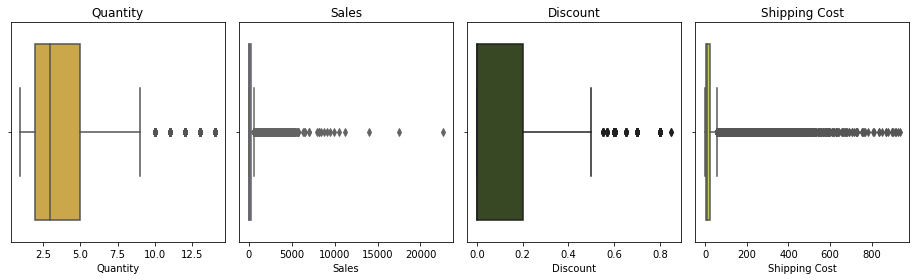

In [231]:
import random
import matplotlib.pyplot as plt  
categorical= dataset.select_dtypes(include= "O")
numerical= dataset.select_dtypes(exclude= "O")
def rand_color():
    return "#" + "".join([random.choice('0123456789ABCDEF') for _ in range(6)])

# Select the numerical columns from the DataFrame.
numerical_columns = dataset.select_dtypes(include=[np.number]).columns.tolist()

# Calculate the number of rows needed for subplots.
num_cols = len(numerical_columns)
num_rows = num_cols // 4
num_rows += num_cols % 4
position = range(1, num_cols + 1)

fig = plt.figure(figsize=(16, num_rows * 4))

# Loop through each numerical column and create a subplot.
for k, col in zip(position, numerical_columns):
    ax = fig.add_subplot(num_rows, 5, k) 
    sns.boxplot(x=dataset[col], ax=ax, color=rand_color())  
    ax.set_title(col) 

plt.tight_layout()
plt.show()

In [232]:
q1,q3=np.quantile(dataset['Quantity'],q=[0.25,0.75])
iqr = q3 - q1
dataset[~((q1 - 1.5*iqr <= dataset['Quantity']) & (dataset['Quantity']<= q3 + 1.5*iqr))]

,Order Priority,Category,Sub-Category,Quantity,Sales,Discount,Shipping Cost,Ship Mode,Country,Order Date,Ship Date,Market
5,High,Furniture,Furnishings,10,211.92,0.60,34.76,Standard Class,Turkey,2012-11-13,2012-11-17,EMEA
103,Critical,Furniture,Tables,14,4486.86,0.00,50.43,First Class,Ukraine,2012-03-20,2012-03-23,EMEA
200,Medium,Furniture,Bookcases,14,1729.14,0.00,164.33,Standard Class,China,2011-07-16,2011-07-20,APAC
581,Low,Furniture,Bookcases,10,953.94,0.35,4.73,Standard Class,Philippines,2013-09-17,2013-09-24,APAC
613,Medium,Furniture,Bookcases,14,5486.67,0.10,346.60,Standard Class,Australia,2014-06-24,2014-06-28,APAC
...,...,...,...,...,...,...,...,...,...,...,...,...
49426,Medium,Technology,Accessories,10,395.40,0.00,24.21,Second Class,Ghana,2014-11-04,2014-11-06,Africa
49428,Medium,Technology,Accessories,12,474.48,0.00,43.56,Standard Class,Poland,2013-06-05,2013-06-09,EMEA
49457,High,Technology,Accessories,10,1124.10,0.00,14.31,First Class,Uzbekistan,2013-06-10,2013-06-13,EMEA
49607,High,Technology,Machines,10,1619.10,0.00,301.73,Second Class,Albania,2011-03-03,2011-03-05,EMEA


In [233]:
q1,q3=np.quantile(dataset['Sales'],q=[0,0.9])
iqr = q3 - q1
dataset[~((q1 - 1.5*iqr <= dataset['Sales']) & (dataset['Sales']<= q3 + 1.5*iqr))]

,Order Priority,Category,Sub-Category,Quantity,Sales,Discount,Shipping Cost,Ship Mode,Country,Order Date,Ship Date,Market
97,Medium,Furniture,Tables,6,2880.18,0.0,250.06,Second Class,Morocco,2011-12-24,2011-12-28,Africa
102,Medium,Furniture,Tables,8,2563.92,0.0,231.32,Standard Class,Saudi Arabia,2012-06-25,2012-07-01,EMEA
103,Critical,Furniture,Tables,14,4486.86,0.0,50.43,First Class,Ukraine,2012-03-20,2012-03-23,EMEA
107,High,Furniture,Tables,8,2171.16,0.7,390.09,Second Class,Lithuania,2014-01-28,2014-01-30,EMEA
111,High,Furniture,Tables,4,2058.00,0.0,393.62,Standard Class,Azerbaijan,2013-01-23,2013-01-27,EMEA
...,...,...,...,...,...,...,...,...,...,...,...,...
49376,Medium,Technology,Phones,4,2549.76,0.0,336.65,First Class,Democratic Republic of the Congo,2012-06-12,2012-06-14,Africa
49482,Medium,Technology,Copiers,8,1926.72,0.0,130.88,Standard Class,Senegal,2014-09-18,2014-09-23,Africa
49496,Critical,Technology,Copiers,8,2832.96,0.0,903.04,Same Day,Senegal,2013-11-05,2013-11-06,Africa
49607,High,Technology,Machines,10,1619.10,0.0,301.73,Second Class,Albania,2011-03-03,2011-03-05,EMEA


In [234]:
q1,q3=np.quantile(dataset['Discount'],q=[0.25,0.75])
iqr = q3 - q1
dataset[~((q1 - 1.5*iqr <= dataset['Discount']) & (dataset['Discount']<= q3 + 1.5*iqr))]

,Order Priority,Category,Sub-Category,Quantity,Sales,Discount,Shipping Cost,Ship Mode,Country,Order Date,Ship Date,Market
4,Medium,Furniture,Furnishings,4,84.768,0.6,7.54,Standard Class,Turkey,2014-08-15,2014-08-19,EMEA
5,High,Furniture,Furnishings,10,211.920,0.6,34.76,Standard Class,Turkey,2012-11-13,2012-11-17,EMEA
10,Medium,Furniture,Furnishings,6,95.364,0.7,4.70,Standard Class,Lithuania,2013-01-11,2013-01-15,EMEA
14,High,Furniture,Furnishings,2,14.994,0.7,2.10,Standard Class,Yemen,2012-04-03,2012-04-07,EMEA
16,Medium,Furniture,Furnishings,1,9.996,0.6,1.05,Second Class,Turkey,2013-09-24,2013-09-29,EMEA
...,...,...,...,...,...,...,...,...,...,...,...,...
49649,Medium,Technology,Machines,1,65.448,0.6,3.16,Standard Class,Turkey,2013-12-25,2013-12-30,EMEA
49656,Medium,Technology,Machines,1,120.072,0.6,7.12,Standard Class,Turkey,2013-07-22,2013-07-26,EMEA
49664,Low,Technology,Machines,1,16.032,0.6,1.62,Standard Class,Turkey,2014-07-07,2014-07-13,EMEA
49667,Medium,Technology,Machines,4,172.368,0.6,13.61,Standard Class,Turkey,2011-11-03,2011-11-08,EMEA


In [235]:
q1,q3=np.quantile(dataset['Shipping Cost'],q=[0.1,0.9])
iqr = q3 - q1
outliers=dataset[~((q1 - 1.5*iqr <= dataset['Shipping Cost']) & (dataset['Shipping Cost']<= q3 + 1.5*iqr))]
outliers

,Order Priority,Category,Sub-Category,Quantity,Sales,Discount,Shipping Cost,Ship Mode,Country,Order Date,Ship Date,Market
97,Medium,Furniture,Tables,6,2880.18,0.0,250.06,Second Class,Morocco,2011-12-24,2011-12-28,Africa
102,Medium,Furniture,Tables,8,2563.92,0.0,231.32,Standard Class,Saudi Arabia,2012-06-25,2012-07-01,EMEA
107,High,Furniture,Tables,8,2171.16,0.7,390.09,Second Class,Lithuania,2014-01-28,2014-01-30,EMEA
111,High,Furniture,Tables,4,2058.00,0.0,393.62,Standard Class,Azerbaijan,2013-01-23,2013-01-27,EMEA
129,Critical,Furniture,Tables,4,2134.44,0.0,315.57,Second Class,Zambia,2011-09-08,2011-09-10,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...
49607,High,Technology,Machines,10,1619.10,0.0,301.73,Second Class,Albania,2011-03-03,2011-03-05,EMEA
49625,Critical,Technology,Machines,6,1519.92,0.0,286.20,First Class,Madagascar,2013-10-14,2013-10-15,Africa
49633,Critical,Technology,Machines,4,1207.56,0.0,278.34,Second Class,Saudi Arabia,2011-12-27,2011-12-29,EMEA
49636,Critical,Technology,Machines,4,1018.32,0.0,255.69,Second Class,Democratic Republic of the Congo,2014-08-12,2014-08-15,Africa


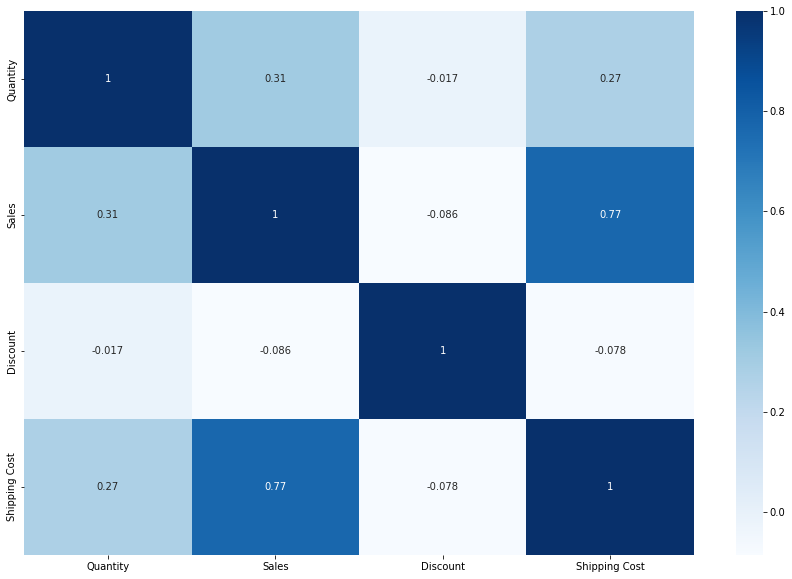

In [236]:
dataset.corr()
plt.figure(figsize=(15,10))
sns.heatmap(dataset.corr(), annot=True, cmap='Blues')
plt.show()

In [237]:
print(dataset['Category'].unique())
print(dataset['Order Priority'].unique())
print(dataset['Sub-Category'].unique())
print(dataset['Ship Mode'].unique())

['Furniture' 'Office Supplies' 'Technology']
['Medium' 'High' 'Critical' 'Low']
['Furnishings' 'Tables' 'Bookcases' 'Chairs' 'Binders' 'Fasteners'
 'Supplies' 'Envelopes' 'Appliances' 'Art' 'Labels' 'Paper' 'Storage'
 'Accessories' 'Phones' 'Copiers' 'Machines']
['Standard Class' 'Second Class' 'First Class' 'Same Day']


In [238]:
print(dataset['Category'].value_counts())
print(dataset['Order Priority'].value_counts())
print(dataset['Sub-Category'].value_counts())
print(dataset['Ship Mode'].value_counts())

Office Supplies    30287
Technology          9788
Furniture           9595
Name: Category, dtype: int64
Medium      28538
High        15038
Critical     3769
Low          2325
Name: Order Priority, dtype: int64
Binders        5967
Storage        4849
Art            4680
Paper          3479
Chairs         3340
Phones         3244
Furnishings    3088
Accessories    3011
Labels         2550
Envelopes      2374
Fasteners      2364
Supplies       2349
Bookcases      2319
Copiers        2133
Appliances     1675
Machines       1400
Tables          848
Name: Sub-Category, dtype: int64
Standard Class    29846
Second Class       9972
First Class        7232
Same Day           2620
Name: Ship Mode, dtype: int64


In [239]:
mapping = {'Critical': 1, 'High': 2, 'Medium': 3, 'Low': 4}
dataset['Order Priority'] = dataset['Order Priority'].replace(mapping)

dataset

,Order Priority,Category,Sub-Category,Quantity,Sales,Discount,Shipping Cost,Ship Mode,Country,Order Date,Ship Date,Market
0,3,Furniture,Furnishings,1,53.040,0.0,4.03,Standard Class,Iraq,2014-09-08,2014-09-15,EMEA
1,3,Furniture,Furnishings,1,50.010,0.0,2.83,Standard Class,Morocco,2012-05-10,2012-05-17,Africa
2,3,Furniture,Furnishings,4,200.040,0.0,10.80,Standard Class,Rwanda,2012-02-20,2012-02-24,Africa
3,2,Furniture,Furnishings,2,100.020,0.0,9.27,Second Class,Liberia,2011-04-13,2011-04-15,Africa
4,3,Furniture,Furnishings,4,84.768,0.6,7.54,Standard Class,Turkey,2014-08-15,2014-08-19,EMEA
...,...,...,...,...,...,...,...,...,...,...,...,...
49665,3,Technology,Machines,2,80.160,0.0,4.68,Standard Class,Mozambique,2013-04-19,2013-04-23,Africa
49666,3,Technology,Machines,14,561.120,0.0,117.40,First Class,Ghana,2014-07-10,2014-07-13,Africa
49667,3,Technology,Machines,4,172.368,0.6,13.61,Standard Class,Turkey,2011-11-03,2011-11-08,EMEA
49668,4,Technology,Machines,1,32.319,0.7,5.77,Standard Class,Nigeria,2013-08-28,2013-09-03,Africa


In [240]:
dataset['Order Date'] = pd.to_datetime(dataset['Order Date'])  
dataset['Ship Date'] = pd.to_datetime(dataset['Ship Date'])  
dataset['duration'] = (dataset['Ship Date'] - dataset['Order Date']).dt.days
dataset['Day of Week'] = dataset['Order Date'].dt.dayofweek

dataset.drop(['Order Date', 'Ship Date'], axis=1, inplace=True)
dataset

,Order Priority,Category,Sub-Category,Quantity,Sales,Discount,Shipping Cost,Ship Mode,Country,Market,duration,Day of Week
0,3,Furniture,Furnishings,1,53.040,0.0,4.03,Standard Class,Iraq,EMEA,7,0
1,3,Furniture,Furnishings,1,50.010,0.0,2.83,Standard Class,Morocco,Africa,7,3
2,3,Furniture,Furnishings,4,200.040,0.0,10.80,Standard Class,Rwanda,Africa,4,0
3,2,Furniture,Furnishings,2,100.020,0.0,9.27,Second Class,Liberia,Africa,2,2
4,3,Furniture,Furnishings,4,84.768,0.6,7.54,Standard Class,Turkey,EMEA,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...
49665,3,Technology,Machines,2,80.160,0.0,4.68,Standard Class,Mozambique,Africa,4,4
49666,3,Technology,Machines,14,561.120,0.0,117.40,First Class,Ghana,Africa,3,3
49667,3,Technology,Machines,4,172.368,0.6,13.61,Standard Class,Turkey,EMEA,5,3
49668,4,Technology,Machines,1,32.319,0.7,5.77,Standard Class,Nigeria,Africa,6,2


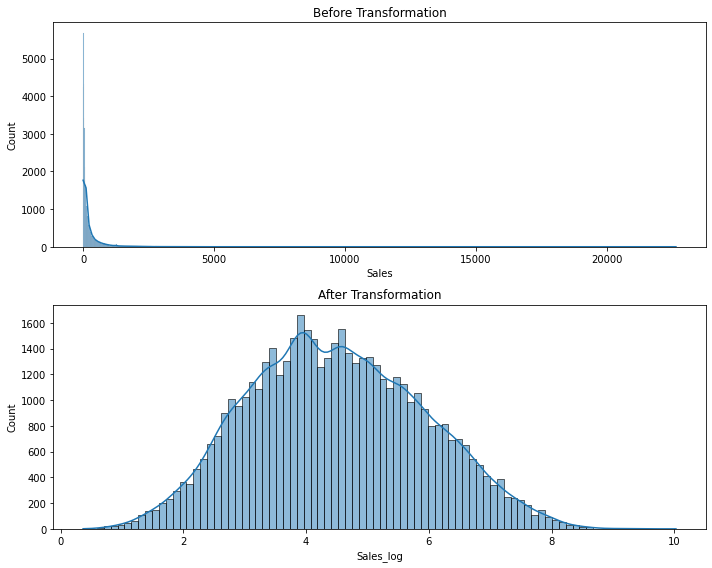

In [241]:
fig, axes = plt.subplots(nrows=2, figsize=(10, 8))

# Plot the 'Sales' column before log transformation
axes[0].set_title('Before Transformation')
sns.histplot(processed_df1['Sales'], kde=True, ax=axes[0])
processed_df1['Sales_log'] = np.log1p(processed_df1['Sales'])
axes[1].set_title('After Transformation')
sns.histplot(processed_df1['Sales_log'], kde=True, ax=axes[1])
plt.tight_layout()
plt.show()

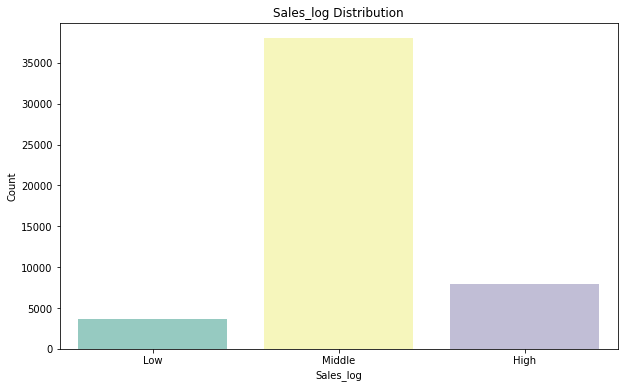

In [242]:
# Divide the 'Sales_log' column into equally spaced intervals
processed_df1['Sales_log'] = pd.cut(processed_df1['Sales_log'], bins=[0, 2.5, 6, np.inf], labels=['Low', 'Middle', 'High'])

# Create a figure for the count plot
plt.figure(figsize=(10,6))

# Plot the count of each Sales_log category using a bar plot
sns.countplot(data=processed_df1, x='Sales_log', order=['Low', 'Middle', 'High'], palette="Set3")


plt.title('Sales_log Distribution')
plt.xlabel('Sales_log')
plt.ylabel('Count')


plt.show()

In [243]:
processed_df1

,Order Priority,Quantity,Sales,Discount,Shipping Cost,Ship Mode,Market,duration,Day of Week,Category_encoded,Sub-Category_encoded,Country_encoded,Market_encoded,Sales_log,Sales_log_encoded
0,3,1,53.040,0.0,0.004315,Standard Class,EMEA,7,0,0.0,9.0,60.0,3.0,Middle,2.0
1,3,1,50.010,0.0,0.003029,Standard Class,Africa,7,3,0.0,9.0,85.0,1.0,Middle,2.0
2,3,4,200.040,0.0,0.011566,Standard Class,Africa,4,0,0.0,9.0,108.0,1.0,Middle,2.0
3,2,2,100.020,0.0,0.009928,Second Class,Africa,2,2,0.0,9.0,72.0,1.0,Middle,2.0
4,3,4,84.768,0.6,0.008074,Standard Class,EMEA,4,4,0.0,9.0,133.0,3.0,Middle,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49665,3,2,80.160,0.0,0.005011,Standard Class,Africa,4,4,2.0,11.0,86.0,1.0,Middle,2.0
49666,3,14,561.120,0.0,0.125752,First Class,Africa,3,3,2.0,11.0,48.0,1.0,High,0.0
49667,3,4,172.368,0.6,0.014576,Standard Class,EMEA,5,3,2.0,11.0,133.0,3.0,Middle,2.0
49668,4,1,32.319,0.7,0.006178,Standard Class,Africa,6,2,2.0,11.0,94.0,1.0,Middle,2.0


In [245]:
from sklearn.preprocessing import OrdinalEncoder

# Define a function to encode a column using OrdinalEncoder
def encode_column(df, column_name, new_column_name):
    X = df[column_name].values.reshape(-1, 1)  # Reshape the column values for encoding

    enc = OrdinalEncoder()  # Create an instance of the OrdinalEncoder

    df[new_column_name] = enc.fit_transform(X).ravel()  # Fit and transform the column values and assign to a new column

    return df

# Define the columns to encode and their corresponding new column names
columns_to_encode = {
    'Category': 'Category_encoded',
    'Sub-Category': 'Sub-Category_encoded',
    'Country':'Country_encoded',
    'Market':'Market_encoded'
}

for original_column, new_column in columns_to_encode.items():
    processed_df1 = encode_column(dataset, original_column, new_column)

# Display a subset of columns before and after encoding
processed_df1[['Category', 'Category_encoded', 'Sub-Category', 'Sub-Category_encoded']].head(100)


,Category,Category_encoded,Sub-Category,Sub-Category_encoded
0,Furniture,0.0,Furnishings,9.0
1,Furniture,0.0,Furnishings,9.0
2,Furniture,0.0,Furnishings,9.0
3,Furniture,0.0,Furnishings,9.0
4,Furniture,0.0,Furnishings,9.0
...,...,...,...,...
95,Furniture,0.0,Tables,16.0
96,Furniture,0.0,Tables,16.0
97,Furniture,0.0,Tables,16.0
98,Furniture,0.0,Tables,16.0


In [246]:
processed_df = pd.get_dummies(dataset, columns = ['Category','Sub-Category','Market'])
processed_df

,Order Priority,Quantity,Sales,Discount,Shipping Cost,Ship Mode,Country,duration,Day of Week,Category_encoded,...,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables,Market_APAC,Market_Africa,Market_Canada,Market_EMEA,Market_EU,Market_LATAM,Market_US
0,3,1,53.040,0.0,4.03,Standard Class,Iraq,7,0,0.0,...,0,0,0,0,0,0,1,0,0,0
1,3,1,50.010,0.0,2.83,Standard Class,Morocco,7,3,0.0,...,0,0,0,0,1,0,0,0,0,0
2,3,4,200.040,0.0,10.80,Standard Class,Rwanda,4,0,0.0,...,0,0,0,0,1,0,0,0,0,0
3,2,2,100.020,0.0,9.27,Second Class,Liberia,2,2,0.0,...,0,0,0,0,1,0,0,0,0,0
4,3,4,84.768,0.6,7.54,Standard Class,Turkey,4,4,0.0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49665,3,2,80.160,0.0,4.68,Standard Class,Mozambique,4,4,2.0,...,0,0,0,0,1,0,0,0,0,0
49666,3,14,561.120,0.0,117.40,First Class,Ghana,3,3,2.0,...,0,0,0,0,1,0,0,0,0,0
49667,3,4,172.368,0.6,13.61,Standard Class,Turkey,5,3,2.0,...,0,0,0,0,0,0,1,0,0,0
49668,4,1,32.319,0.7,5.77,Standard Class,Nigeria,6,2,2.0,...,0,0,0,0,1,0,0,0,0,0


In [249]:
from sklearn.preprocessing import MinMaxScaler

numerical_columns = [ 'Sales','Shipping Cost']


scaler = MinMaxScaler()
processed_df[numerical_columns] = scaler.fit_transform(processed_df[numerical_columns])
processed_df1[numerical_columns] = scaler.fit_transform(processed_df1[numerical_columns])
processed_df1

,Order Priority,Category,Sub-Category,Quantity,Sales,Discount,Shipping Cost,Ship Mode,Country,Market,duration,Day of Week,Category_encoded,Sub-Category_encoded,Country_encoded,Market_encoded
0,3,Furniture,Furnishings,1,0.002323,0.0,0.004315,Standard Class,Iraq,EMEA,7,0,0.0,9.0,60.0,3.0
1,3,Furniture,Furnishings,1,0.002189,0.0,0.003029,Standard Class,Morocco,Africa,7,3,0.0,9.0,85.0,1.0
2,3,Furniture,Furnishings,4,0.008817,0.0,0.011566,Standard Class,Rwanda,Africa,4,0,0.0,9.0,108.0,1.0
3,2,Furniture,Furnishings,2,0.004399,0.0,0.009928,Second Class,Liberia,Africa,2,2,0.0,9.0,72.0,1.0
4,3,Furniture,Furnishings,4,0.003725,0.6,0.008074,Standard Class,Turkey,EMEA,4,4,0.0,9.0,133.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49665,3,Technology,Machines,2,0.003521,0.0,0.005011,Standard Class,Mozambique,Africa,4,4,2.0,11.0,86.0,1.0
49666,3,Technology,Machines,14,0.024767,0.0,0.125752,First Class,Ghana,Africa,3,3,2.0,11.0,48.0,1.0
49667,3,Technology,Machines,4,0.007594,0.6,0.014576,Standard Class,Turkey,EMEA,5,3,2.0,11.0,133.0,3.0
49668,4,Technology,Machines,1,0.001408,0.7,0.006178,Standard Class,Nigeria,Africa,6,2,2.0,11.0,94.0,1.0


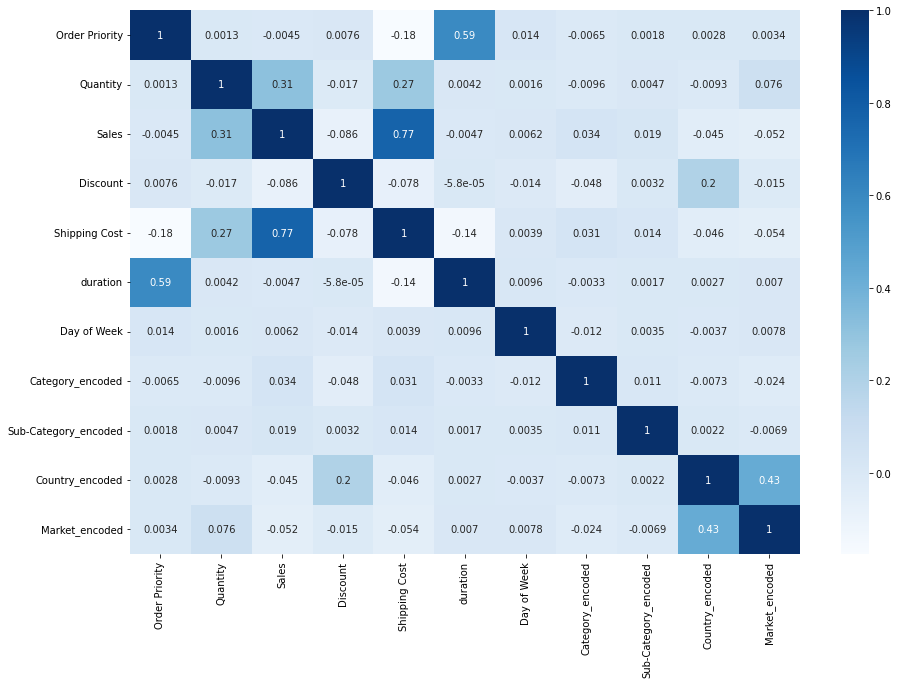

In [250]:
processed_df1.corr()
plt.figure(figsize=(15,10))
sns.heatmap(processed_df1.corr(), annot=True, cmap='Blues')
plt.show()

In [251]:
processed_df

,Order Priority,Quantity,Sales,Discount,Shipping Cost,Ship Mode,Country,duration,Day of Week,Category_encoded,...,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables,Market_APAC,Market_Africa,Market_Canada,Market_EMEA,Market_EU,Market_LATAM,Market_US
0,3,1,0.002323,0.0,0.004315,Standard Class,Iraq,7,0,0.0,...,0,0,0,0,0,0,1,0,0,0
1,3,1,0.002189,0.0,0.003029,Standard Class,Morocco,7,3,0.0,...,0,0,0,0,1,0,0,0,0,0
2,3,4,0.008817,0.0,0.011566,Standard Class,Rwanda,4,0,0.0,...,0,0,0,0,1,0,0,0,0,0
3,2,2,0.004399,0.0,0.009928,Second Class,Liberia,2,2,0.0,...,0,0,0,0,1,0,0,0,0,0
4,3,4,0.003725,0.6,0.008074,Standard Class,Turkey,4,4,0.0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49665,3,2,0.003521,0.0,0.005011,Standard Class,Mozambique,4,4,2.0,...,0,0,0,0,1,0,0,0,0,0
49666,3,14,0.024767,0.0,0.125752,First Class,Ghana,3,3,2.0,...,0,0,0,0,1,0,0,0,0,0
49667,3,4,0.007594,0.6,0.014576,Standard Class,Turkey,5,3,2.0,...,0,0,0,0,0,0,1,0,0,0
49668,4,1,0.001408,0.7,0.006178,Standard Class,Nigeria,6,2,2.0,...,0,0,0,0,1,0,0,0,0,0


In [252]:
processed_df1.drop(['Category','Sub-Category','Country'], axis=1 ,inplace=True)

In [253]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the features and target column
features = ['Order Priority', 'Quantity', 'Sales', 'Discount','Shipping Cost','duration','Day of Week','Category_Furniture','Category_Office Supplies','Category_Technology','Sub-Category_Accessories','Sub-Category_Appliances','Sub-Category_Art','Sub-Category_Binders','Sub-Category_Bookcases','Sub-Category_Chairs','Sub-Category_Copiers','Sub-Category_Envelopes','Sub-Category_Fasteners','Sub-Category_Furnishings','Sub-Category_Labels','Sub-Category_Machines','Sub-Category_Paper','Sub-Category_Phones','Sub-Category_Storage','Sub-Category_Supplies','Sub-Category_Tables','Market_APAC','Market_Africa','Market_Canada','Market_EMEA','Market_EU','Market_LATAM','Market_US']
target = 'Ship Mode'

# Split the data into training and testing sets
X = processed_df[features]
y = processed_df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the decision tree classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
# Initialize and fit the decision tree classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.7630360378498088
Precision: 0.7662691302065245
Recall: 0.7630360378498088
F1-score: 0.7645327847570063


In [254]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the features and target column
features = ['Order Priority', 'Quantity', 'Sales', 'Discount','Shipping Cost','duration','Day of Week','Category_encoded','Sub-Category_encoded','Country_encoded']
target = 'Ship Mode'

# Split the data into training and testing sets
X = processed_df1[features]
y = processed_df1[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the decision tree classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
# Initialize and fit the decision tree classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.7643446748540367
Precision: 0.767341781916232
Recall: 0.7643446748540367
F1-score: 0.7656867712116349


In [255]:
processed_df1

,Order Priority,Quantity,Sales,Discount,Shipping Cost,Ship Mode,Market,duration,Day of Week,Category_encoded,Sub-Category_encoded,Country_encoded,Market_encoded
0,3,1,0.002323,0.0,0.004315,Standard Class,EMEA,7,0,0.0,9.0,60.0,3.0
1,3,1,0.002189,0.0,0.003029,Standard Class,Africa,7,3,0.0,9.0,85.0,1.0
2,3,4,0.008817,0.0,0.011566,Standard Class,Africa,4,0,0.0,9.0,108.0,1.0
3,2,2,0.004399,0.0,0.009928,Second Class,Africa,2,2,0.0,9.0,72.0,1.0
4,3,4,0.003725,0.6,0.008074,Standard Class,EMEA,4,4,0.0,9.0,133.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49665,3,2,0.003521,0.0,0.005011,Standard Class,Africa,4,4,2.0,11.0,86.0,1.0
49666,3,14,0.024767,0.0,0.125752,First Class,Africa,3,3,2.0,11.0,48.0,1.0
49667,3,4,0.007594,0.6,0.014576,Standard Class,EMEA,5,3,2.0,11.0,133.0,3.0
49668,4,1,0.001408,0.7,0.006178,Standard Class,Africa,6,2,2.0,11.0,94.0,1.0


In [278]:
from sklearn.neighbors import KNeighborsClassifier

X_train = processed_df1[features]
y_train = processed_df1[target]

# Train model
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Predict the class labels for the test set
y_pred = knn.predict(X_test)

# Print the accuracy score of the classifier
print("Accuracy:", knn.score(X_test, y_test))

# Calculate the precision score
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# Calculate the recall score
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

# Calculate the F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 score:", f1)

Accuracy: 0.8599758405476142
Precision: 0.8544037822563019
Recall: 0.8599758405476142
F1 score: 0.8524335082117661


In [279]:
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison_df.head(20)

,Actual,Predicted
8569,Standard Class,Standard Class
23113,Standard Class,Standard Class
26945,Standard Class,Standard Class
6483,First Class,First Class
29840,First Class,First Class
24663,Standard Class,Standard Class
16094,Standard Class,Standard Class
34176,Second Class,Second Class
35420,Standard Class,Standard Class
28977,Standard Class,Standard Class


In [283]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=3, random_state=42)

# Fit the model to the training data
rfc.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rfc.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

# Calculate the precision score
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# Calculate the recall score
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

# Calculate the F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 score:", f1)

Accuracy: 0.9584256090195289
Precision: 0.9578590136472589
Recall: 0.9584256090195289
F1 score: 0.9579604078292071
